In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl


df=pd.read_excel('result_mod_30June2024.xlsx')


In [2]:
df.info()
#df.columns()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38767 entries, 0 to 38766
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 38767 non-null  int64         
 1   status                     38767 non-null  object        
 2   title                      38767 non-null  object        
 3   ap_num                     38767 non-null  int64         
 4   application_date           38767 non-null  datetime64[ns]
 5   applicant                  38767 non-null  object        
 6   representative             37368 non-null  object        
 7   final_owner                19160 non-null  object        
 8   priority_date              8642 non-null   float64       
 9   international_filing_date  3855 non-null   float64       
 10  summary                    38766 non-null  object        
 11  제너럴                        38767 non-null  int64         
 12  의료  

In [3]:
data = df.copy()

In [4]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os

current_directory=os.getcwd()
# 나눔바른고딕 글꼴 파일 경로 지정
font_path = os.path.join(current_directory, 'NanumBarunGothic.ttf')

# 글꼴이 있는지 확인
if os.path.exists(font_path):
    # 폰트 추가
    fm.fontManager.addfont(font_path)

    # 캐시를 새로 고치지 않고 직접 폰트 설정
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정


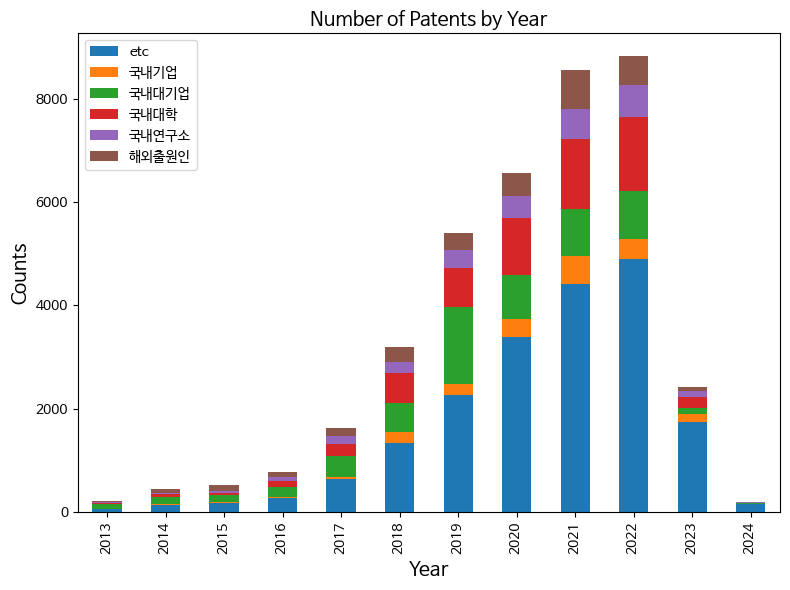

In [5]:
# 출원 건수와 권리 양도 특허 건수
counts = data.groupby(['application_year', 'applicant_lgrp']).size().unstack(fill_value=0)

# 시각화
fig, ax1 = plt.subplots(figsize=(8, 6))

# 막대 그래프 (출원 건수)
counts.plot(kind='bar', stacked=True, ax=ax1)

ax1.set_title('Number of Patents by Year', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Counts', fontsize=14, fontweight='bold')

# 범례 설정
ax1.legend(loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()


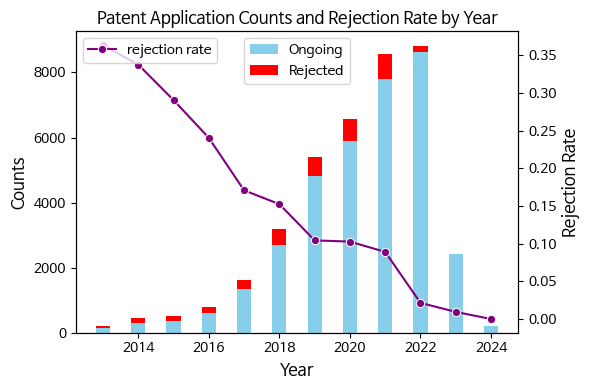

In [6]:
# 출원 건수와 on-going 중인 특허 계산 (거절율 계산)
counts = data.groupby(['application_year', 'ongoing']).size().unstack(fill_value=0)
rejection_rate = counts[0] / counts.sum(axis=1)

# 시각화
fig, ax1 = plt.subplots(figsize=(6, 4))

# 막대 그래프 (출원 건수)
# counts.plot(kind='bar', stacked=True, ax=ax1)
ax1.bar(counts.index, counts[1], width=0.4, label='Ongoing', color='skyblue')
ax1.bar(counts.index, counts[0], width=0.4, bottom=counts[1], label='Rejected', color='red')
ax2 = ax1.twinx()
sns.lineplot(data=rejection_rate,marker='o', color='purple', ax=ax2, label='rejection rate')

# 그래프 제목과 축 레이블 설정
ax1.set_title('Patent Application Counts and Rejection Rate by Year', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Counts', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rejection Rate', fontsize=12, fontweight='bold')

# 오른쪽 Y축 라벨 위치 조정
ax2.yaxis.set_label_position('right')

# 범례 설정
ax1.legend(loc='upper center')
ax2.legend(loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()

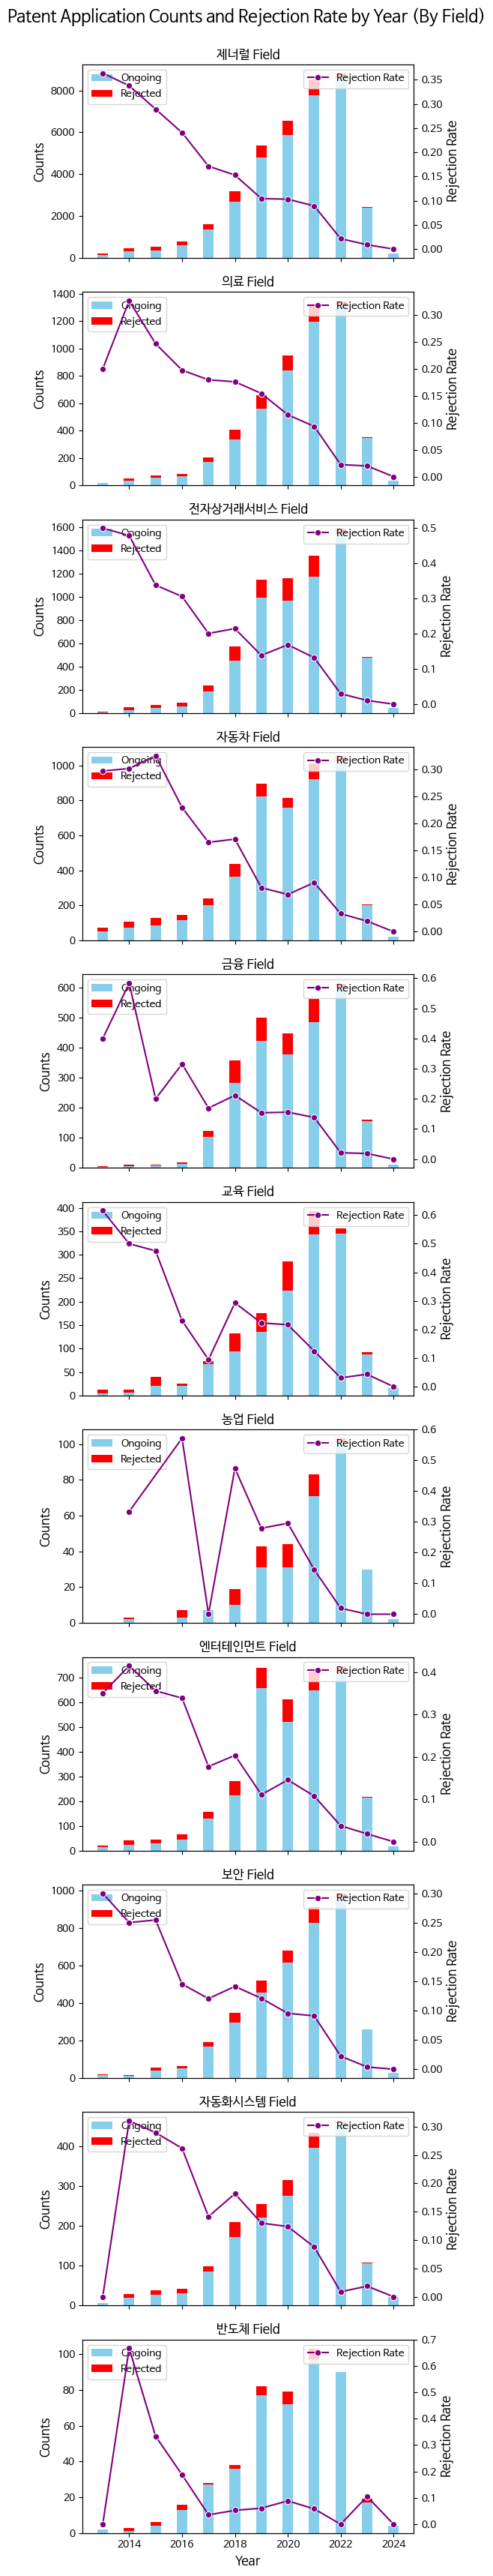

In [7]:
## 전체 출원이 아닌 분야별 거절율 비교
fields=['제너럴', '의료', '전자상거래서비스', '자동차', '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템','반도체']


# subplot 설정
fig, axes = plt.subplots(11, 1, figsize=(6, 35), sharex=True)
fig.suptitle('Patent Application Counts and Rejection Rate by Year (By Field)', fontsize=16, fontweight='bold')

# 각 분야별로 반복하여 subplot에 그래프 그리기
for i, field in enumerate(fields):
    # 분야별 데이터 필터링
    filtered_data = data[data[field] == 1]
    
    # 출원 건수 계산
    counts = filtered_data.groupby(['application_year', 'ongoing']).size().unstack(fill_value=0)
    rejection_rate = counts[0] / counts.sum(axis=1)
    
    # 축 설정
    ax1 = axes[i]
    
    # 막대 그래프 (출원 건수)
    ax1.bar(counts.index, counts[1], width=0.4, label='Ongoing', color='skyblue')
    ax1.bar(counts.index, counts[0], width=0.4, bottom=counts[1], label='Rejected', color='red')
    
    # rejection rate 선 그래프
    ax2 = ax1.twinx()
    sns.lineplot(data=rejection_rate, marker='o', color='purple', ax=ax2, label='Rejection Rate')
    
    # 축 레이블 설정
    ax1.set_ylabel('Counts', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Rejection Rate', fontsize=12, fontweight='bold')
    
    # 오른쪽 Y축 라벨 위치 조정
    ax2.yaxis.set_label_position('right')
    
    # 분야 이름 설정
    ax1.set_title(f'{field.capitalize()} Field', fontsize=12, fontweight='bold')
    
    # 범례 설정
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# x축 레이블 설정
axes[-1].set_xlabel('Year', fontsize=12, fontweight='bold')

# 그래프 간 간격 조정
plt.tight_layout(rect=[0, 0, 1, 0.98])

# 그래프 출력
plt.show()

In [8]:
data.columns

Index(['Unnamed: 0', 'status', 'title', 'ap_num', 'application_date',
       'applicant', 'representative', 'final_owner', 'priority_date',
       'international_filing_date', 'summary', '제너럴', '의료', '전자상거래서비스', '자동차',
       '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', '반도체', 'applicant_sgrp',
       'applicant_lgrp', 'ongoing', 'application_year'],
      dtype='object')

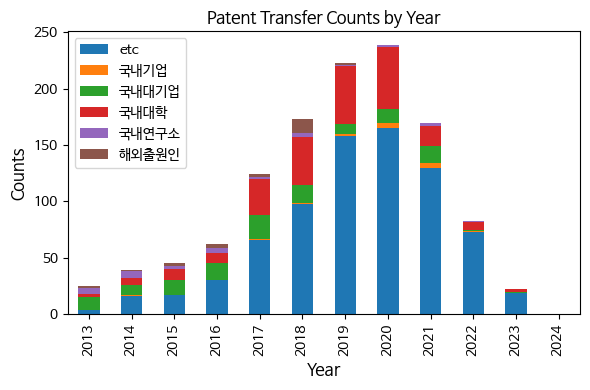

In [9]:
# 출원 건수와 권리 양도 특허 건수
counts = data.groupby(['application_year', 'applicant_lgrp']).size().unstack(fill_value=0)
counts.sum(axis=1)
filtered_data = data[(data['applicant'] != data['final_owner']) & (data['final_owner'].notnull()) & (data['final_owner'].str != '')]
filtered_counts=filtered_data.groupby(['application_year', 'applicant_lgrp']).size().unstack(fill_value=0)
# 전체 연도에 대해 filtered_counts에 0 추가 (2024년 데이터가 없을 때)
years = counts.index.union(filtered_counts.index)
filtered_counts = filtered_counts.reindex(years, fill_value=0)

filtered_counts.sum(axis=1)
transfer_rate = filtered_counts.sum(axis=1) / counts.sum(axis=1)

# 시각화
fig, ax1 = plt.subplots(figsize=(6, 4))

# 막대 그래프 (출원 건수)
filtered_counts.plot(kind='bar', stacked=True, ax=ax1)
#ax1.bar(counts.index, counts[1], width=0.4, label='Ongoing', color='skyblue')
#ax1.bar(counts.index, counts[0], width=0.4, bottom=counts[1], label='Rejected', color='red')
#ax2 = ax1.twinx()
#sns.lineplot(data=rejection_rate,marker='o', color='purple', ax=ax2, label='rejection rate')

# 그래프 제목과 축 레이블 설정
ax1.set_title('Patent Transfer Counts by Year', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Counts', fontsize=12, fontweight='bold')
#ax2.set_ylabel('Rejection Rate', fontsize=12, fontweight='bold')

# 오른쪽 Y축 라벨 위치 조정
#ax2.yaxis.set_label_position('right')

# 범례 설정
ax1.legend(loc='upper left')
#ax2.legend(loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()


In [10]:
counts

applicant_lgrp,etc,국내기업,국내대기업,국내대학,국내연구소,해외출원인
application_year,,,,,,
2013,62,3,94,15,23,23
2014,145,11,136,60,27,80
2015,182,11,147,41,28,114
2016,279,16,191,122,65,113
2017,644,41,399,245,142,151
2018,1336,212,573,566,218,289
2019,2264,225,1477,768,338,323
2020,3386,353,847,1106,435,432
2021,4422,542,894,1368,578,752


In [11]:
filtered_counts

applicant_lgrp,etc,국내기업,국내대기업,국내대학,국내연구소,해외출원인
application_year,,,,,,
2013,4,0,11,3,5,2
2014,16,1,9,6,6,1
2015,17,0,13,10,3,2
2016,30,0,15,9,5,3
2017,66,1,21,32,2,2
2018,98,1,16,42,4,12
2019,158,2,9,51,1,2
2020,165,5,12,55,2,0
2021,130,4,15,18,3,0


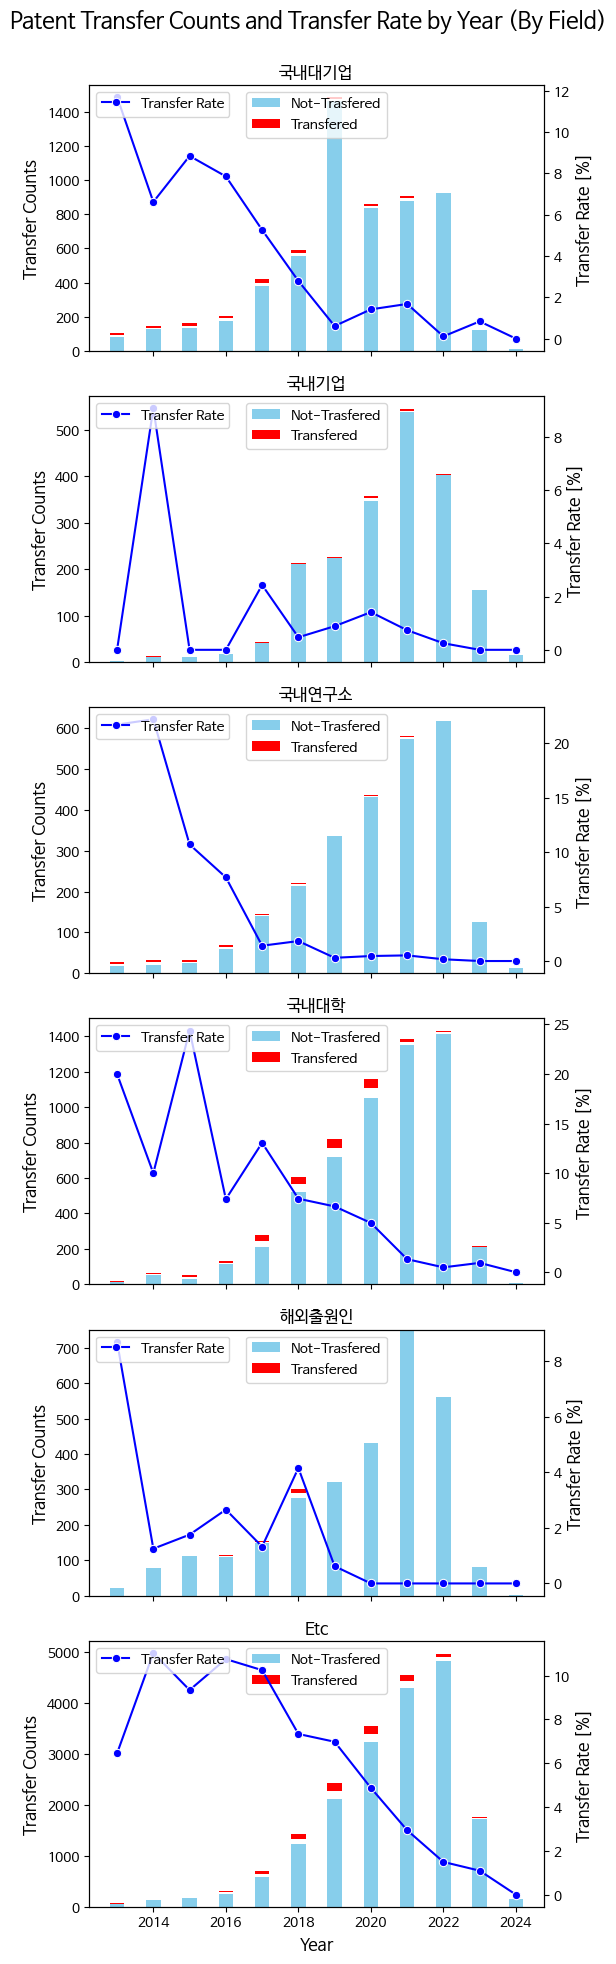

In [12]:
## 전체 출원이 아닌 분야별 거절율 비교
grps=['국내대기업','국내기업','국내연구소','국내대학','해외출원인','etc']
#filtered_counts.loc['2024']=0
# subplot 설정
fig, axes = plt.subplots(6, 1, figsize=(6, 20), sharex=True)
fig.suptitle('Patent Transfer Counts and Transfer Rate by Year (By Field)', fontsize=16, fontweight='bold')

# 각 분야별로 반복하여 subplot에 그래프 그리기
for i, grp in enumerate(grps):
    transfer_rate = (filtered_counts[grp] / counts[grp])*100
    holders=counts[grp]-filtered_counts[grp]

    # 축 설정
    ax1 = axes[i]
    
    # 막대 그래프 (출원 건수)
    ax1.bar(counts.index, holders, width=0.4, label='Not-Trasfered', color='skyblue')
    ax1.bar(filtered_counts.index, filtered_counts[grp], width=0.4, bottom=counts[grp], label='Transfered', color='red')
    
    # rejection rate 선 그래프
    ax2 = ax1.twinx()
    sns.lineplot(data=transfer_rate,marker='o', color='blue', ax=ax2, label='Transfer Rate')
    
    # 축 레이블 설정
    ax1.set_ylabel('Transfer Counts', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Transfer Rate [%]', fontsize=12, fontweight='bold')
    
    # 오른쪽 Y축 라벨 위치 조정
    ax2.yaxis.set_label_position('right')
    
    # GRP title
    ax1.set_title(f'{grp.capitalize()}', fontsize=12, fontweight='bold')
    
    # 범례 설정
    ax1.legend(loc='upper center')
    ax2.legend(loc='upper left')

# x축 레이블 설정
axes[-1].set_xlabel('Year', fontsize=12, fontweight='bold')

# 그래프 간 간격 조정
plt.tight_layout(rect=[0, 0, 1, 0.98])

# 그래프 출력
plt.show()

In [13]:
categories = ['제너럴', '의료', '전자상거래서비스', '자동차', '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', '반도체']
counts = data.groupby('applicant_lgrp')[categories].sum().reset_index()

# 데이터를 'long' format으로 변환
counts_long = counts.melt(id_vars='applicant_lgrp', var_name='category', value_name='count')

In [14]:
counts

,applicant_lgrp,제너럴,의료,전자상거래서비스,자동차,금융,교육,농업,엔터테인먼트,보안,자동화시스템,반도체
0,etc,19481,3241,4650,2122,1880,1003,240,2123,2263,1165,152
1,국내기업,1987,325,293,136,197,67,6,143,174,46,36
2,국내대기업,5790,412,1005,1600,148,219,9,710,505,312,85
3,국내대학,5885,1106,425,509,211,218,47,331,670,202,103
4,국내연구소,2591,283,182,320,84,60,37,118,284,144,53
5,해외출원인,2906,141,233,456,309,48,2,241,182,148,41


In [15]:
counts_long

,applicant_lgrp,category,count
0,etc,제너럴,19481
1,국내기업,제너럴,1987
2,국내대기업,제너럴,5790
3,국내대학,제너럴,5885
4,국내연구소,제너럴,2591
...,...,...,...
61,국내기업,반도체,36
62,국내대기업,반도체,85
63,국내대학,반도체,103
64,국내연구소,반도체,53


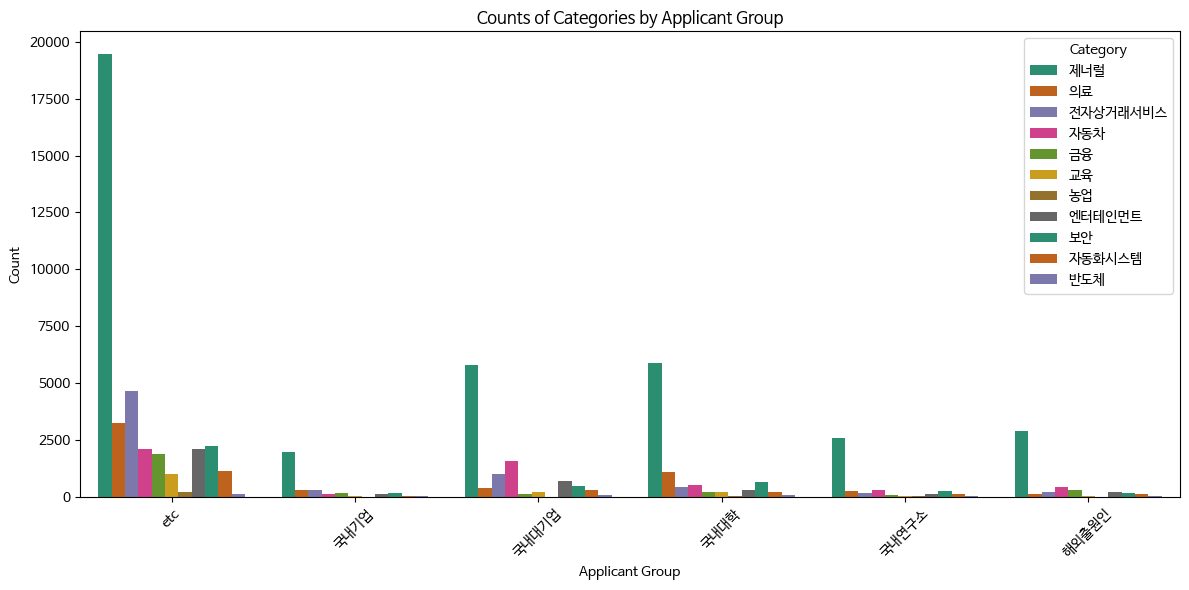

In [16]:
### Categories의 경우 해당 분류에 속할 경우 1, 그렇지 않으면 0으로 column별로 인코딩되어 있음.
### 출원인 그룹별 응용 카테고리별 특허 출원 count 비교 

categories = ['제너럴', '의료', '전자상거래서비스', '자동차', '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', '반도체']
counts = data.groupby('applicant_lgrp')[categories].sum().reset_index()

# 데이터를 'long' format으로 변환
counts_long = counts.melt(id_vars='applicant_lgrp', var_name='category', value_name='count')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=counts_long, x='applicant_lgrp', y='count', hue='category', palette='Dark2')
plt.xticks(rotation=45)
plt.xlabel('Applicant Group')
plt.ylabel('Count')
plt.title('Counts of Categories by Applicant Group')
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.show()

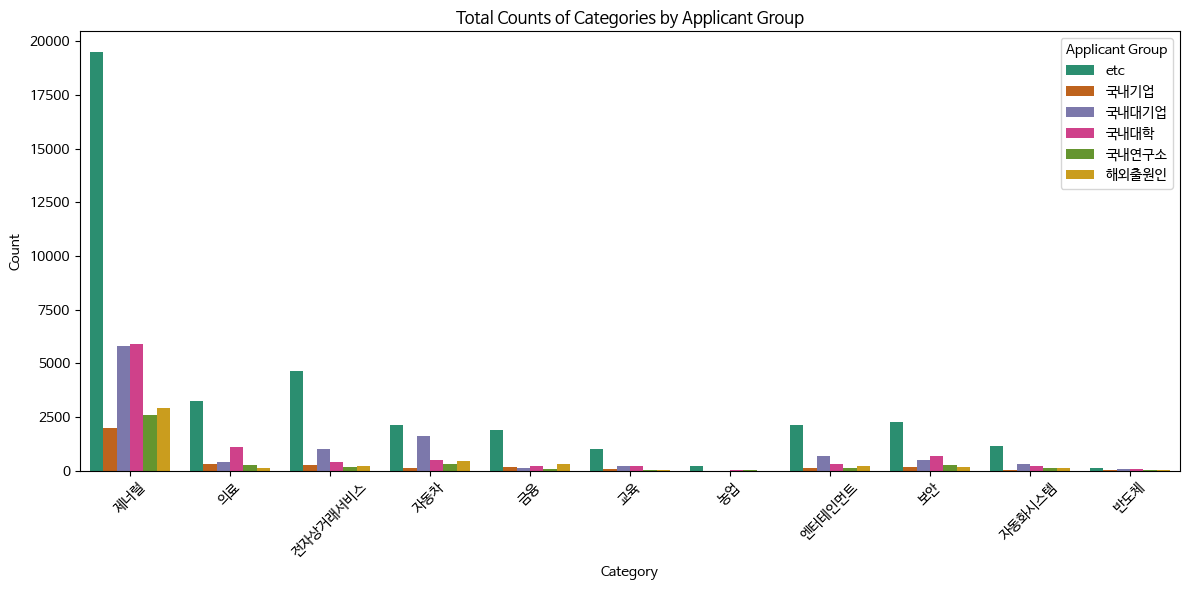

In [17]:
category_sums = data.groupby('applicant_lgrp')[categories].sum().reset_index()

# 데이터를 'long' format으로 변환
category_sums_long = category_sums.melt(id_vars='applicant_lgrp', value_vars=categories,
                                        var_name='category', value_name='count')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sums_long, x='category', y='count', hue='applicant_lgrp', palette='Dark2')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Total Counts of Categories by Applicant Group')
plt.legend(title='Applicant Group', loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
categories=['제너럴', '의료', '전자상거래서비스', '자동차','금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', '반도체']
data_pv=pd.pivot_table(data, index='applicant_lgrp', values=categories, aggfunc='sum', fill_value=0)

data_pv


,교육,금융,농업,반도체,보안,엔터테인먼트,의료,자동차,자동화시스템,전자상거래서비스,제너럴
applicant_lgrp,,,,,,,,,,,
etc,1003,1880,240,152,2263,2123,3241,2122,1165,4650,19481
국내기업,67,197,6,36,174,143,325,136,46,293,1987
국내대기업,219,148,9,85,505,710,412,1600,312,1005,5790
국내대학,218,211,47,103,670,331,1106,509,202,425,5885
국내연구소,60,84,37,53,284,118,283,320,144,182,2591
해외출원인,48,309,2,41,182,241,141,456,148,233,2906


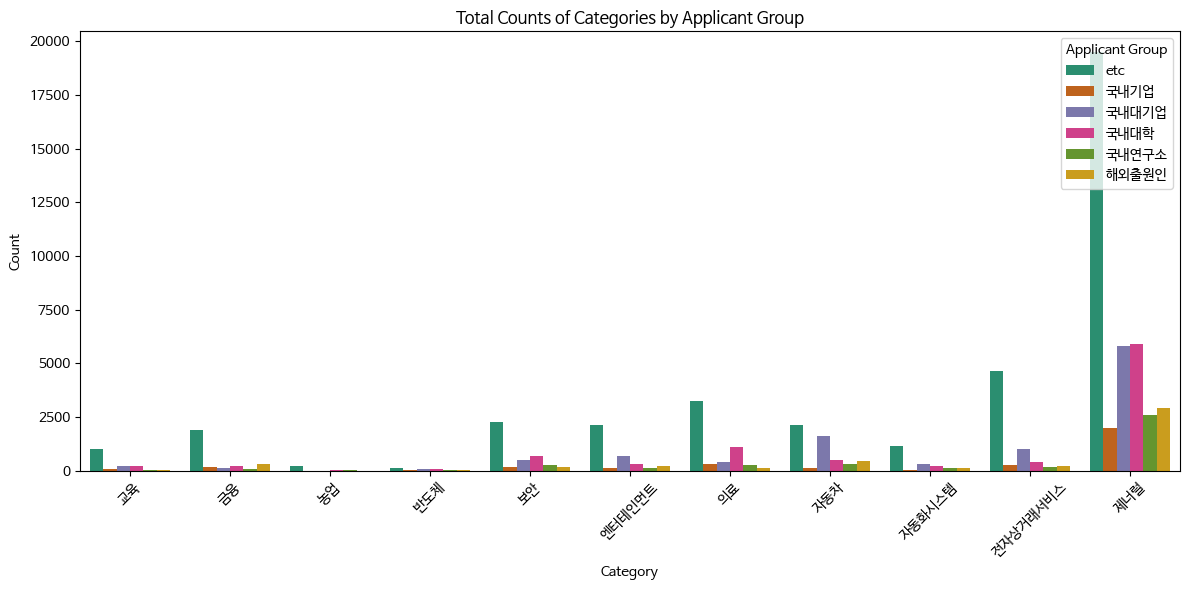

In [19]:
# 데이터를 'long' format으로 변환
data_pv_long = data_pv.reset_index().melt(id_vars='applicant_lgrp', var_name='category', value_name='count')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=data_pv_long, x='category', y='count', hue='applicant_lgrp', palette='Dark2')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Total Counts of Categories by Applicant Group')
plt.legend(title='Applicant Group', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4224\1684871314.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_pv, x='applicant_lgrp', y=field, ax=ax1, palette='Dark2')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4224\1684871314.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4224\1684871314.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_pv, x='applicant_lgrp', y=field, ax=ax1, palette='Dark2')
C:\Users\Administrator\AppData\Local\Temp\ip

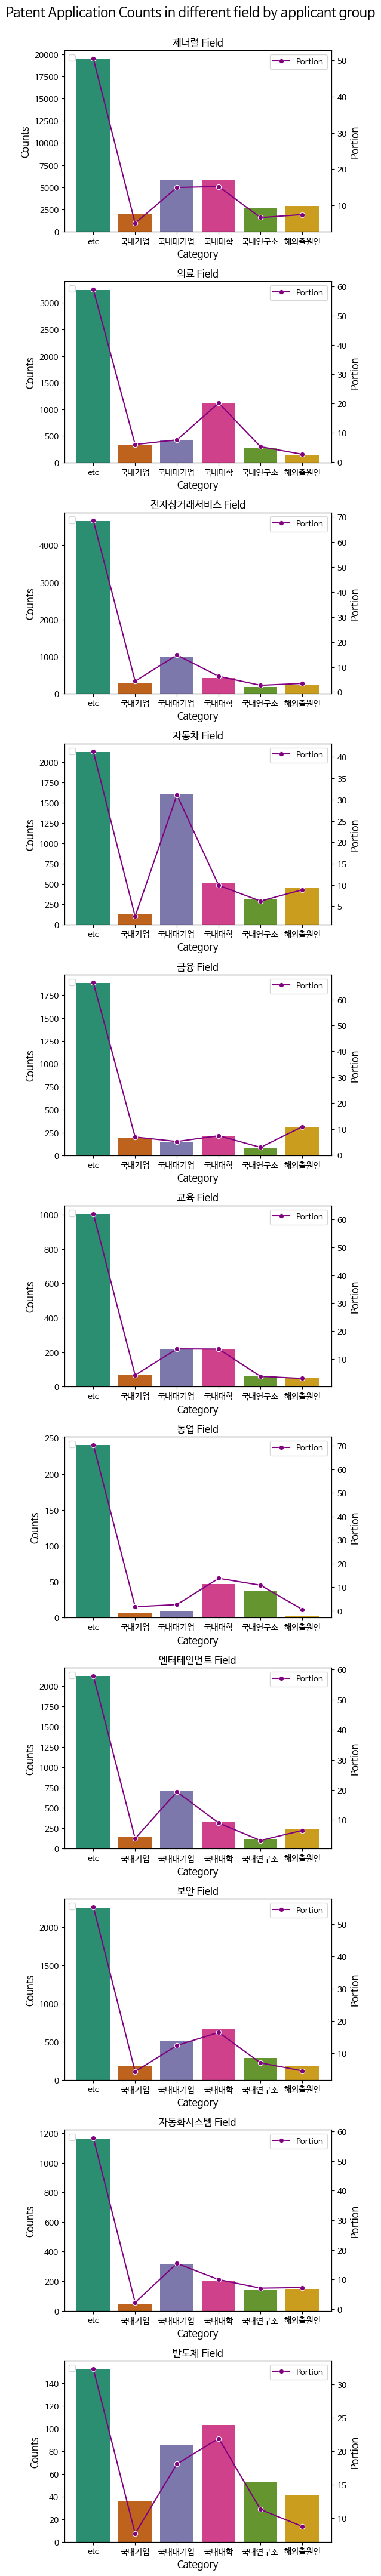

In [20]:
## 전체 출원이 아닌 분야별 거절율 비교
fields=['제너럴', '의료', '전자상거래서비스', '자동차', '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템','반도체']

# subplot 설정
fig, axes = plt.subplots(len(fields), 1, figsize=(6, 4 * len(fields)))
#fig, axes = plt.subplots(len(fields), 1, figsize=(6, 5 * len(fields)), sharex=True)
fig.suptitle('Patent Application Counts in different field by applicant group', fontsize=16, fontweight='bold')

# 각 분야별로 반복하여 subplot에 그래프 그리기
for i, field in enumerate(fields):
    # 분야별 데이터 필터링
    data_pv = pd.pivot_table(data, index='applicant_lgrp', values=field, aggfunc='sum', fill_value=0).reset_index()
    # 필드별 총 합 계산
    total_counts = data_pv[field].sum()
    
    # 거절율(portion) 계산
    portion = (data_pv[field] / total_counts)*100


    # 축 설정
    ax1 = axes[i]
    
    # 막대 그래프 (출원 건수)
    sns.barplot(data=data_pv, x='applicant_lgrp', y=field, ax=ax1, palette='Dark2')
    # portion 선 그래프
    ax2 = ax1.twinx()
    sns.lineplot(data=portion, marker='o', color='purple', ax=ax2, label='Portion')
    ax1.set_ylabel('Counts', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Portion', fontsize=12, fontweight='bold')

    # 오른쪽 Y축 라벨 위치 조정
    ax2.yaxis.set_label_position('right')
    
    # 분야 이름 설정
    ax1.set_title(f'{field.capitalize()} Field', fontsize=12, fontweight='bold')
    
    # 범례 설정
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    axes[i].set_xlabel('Category', fontsize=12, fontweight='bold')


# 그래프 간 간격 조정
plt.tight_layout(rect=[0, 0, 1, 0.98])

# 그래프 출력
plt.show()

In [21]:
# 기술 유형별 키워드 리스트
## 지금은 연도별... 상위출원인에 대해서, 관심가는 출원인에 대해서..
keywords_dict = {
    '머신러닝': ['머신러닝','머신 러닝' '기계 학습', '기계학습', 'Machine Learning', 'ML'],
    '딥러닝': ['딥러닝','딥 러닝' '심층 학습', '심층학습', 'Deep Learning', 'DL', '뉴럴 네트워크'],
    '빅데이터': ['빅데이터', 'Big Data'],
    '블록체인': ['블록체인', 'Blockchain'],
    '비전 이미지 모션 인식':['컴퓨터 비전', 'Computer Vision', 'CV','제스처','제스쳐', '피사체','이미지', '동작 인식', '동작인식', '모션 인식','모션인식','객체 인식','오브젝트 인식','패턴인식','패턴 인식','안면','ILSVRC','이미지넷','이미지 넷','알렉스넷','알렉스 넷'],
    '거대언어':['NLP','자연어처리','자연어 처리', '챗봇','거대 언어','거대언어','llm'],
    '생성형': ['생성형','그림 그리기','음성 생성', '보이스', '영상 생성', '영상 제작', '음악 제작','사진 생성', '글쓰기', '이미지 생성','chat gpt','챗 gpt','챗 지피티','제미나이','메타 라마',],
    '일반 인공지능':['agi', '일반 인공지능', '일반 ai', '사람 수준', '자율 인공지능', '자율 AI', '자율 학습'],
    '반도체': ['뉴로모픽', '인공지능 반도체', 'ai 반도체', 'npu', '양자 소자','양자 컴퓨팅','양자 소자','양자 디바이스'],
    '도덕윤리':['법적 책임','법적책임','도덕','윤리','법적 쟁점', '개인정보', '규제', '책임성','법적 규제', '투명성']
}

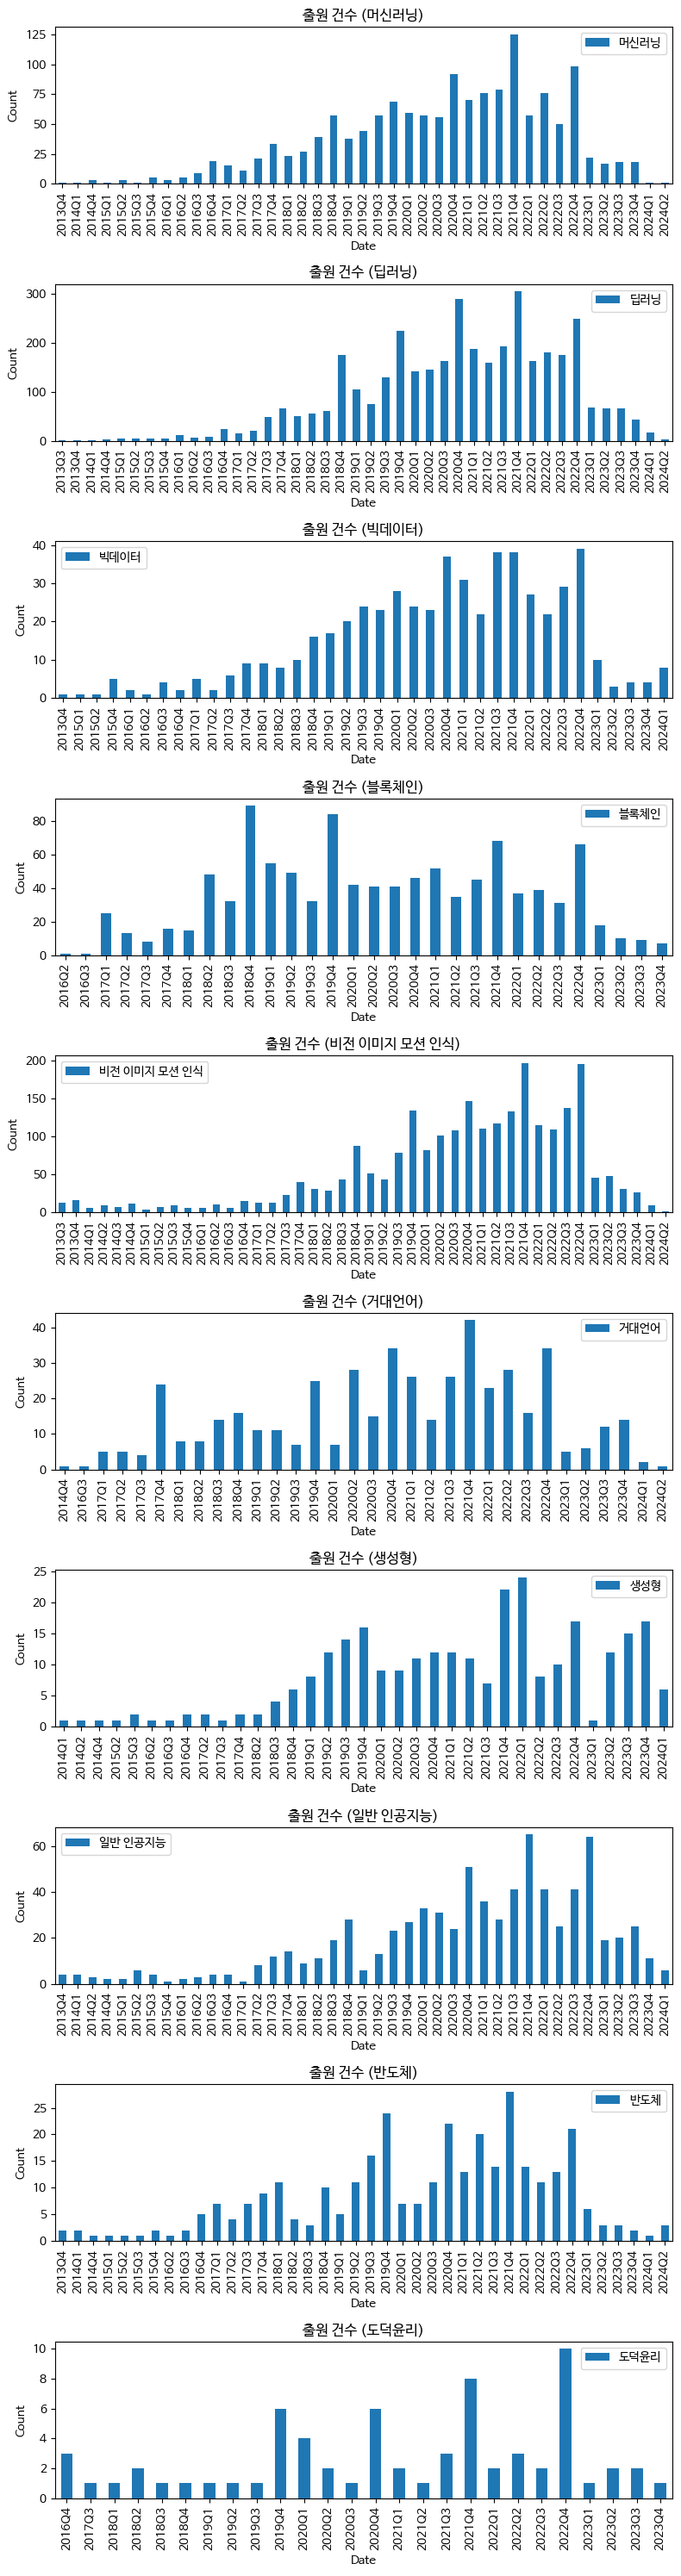

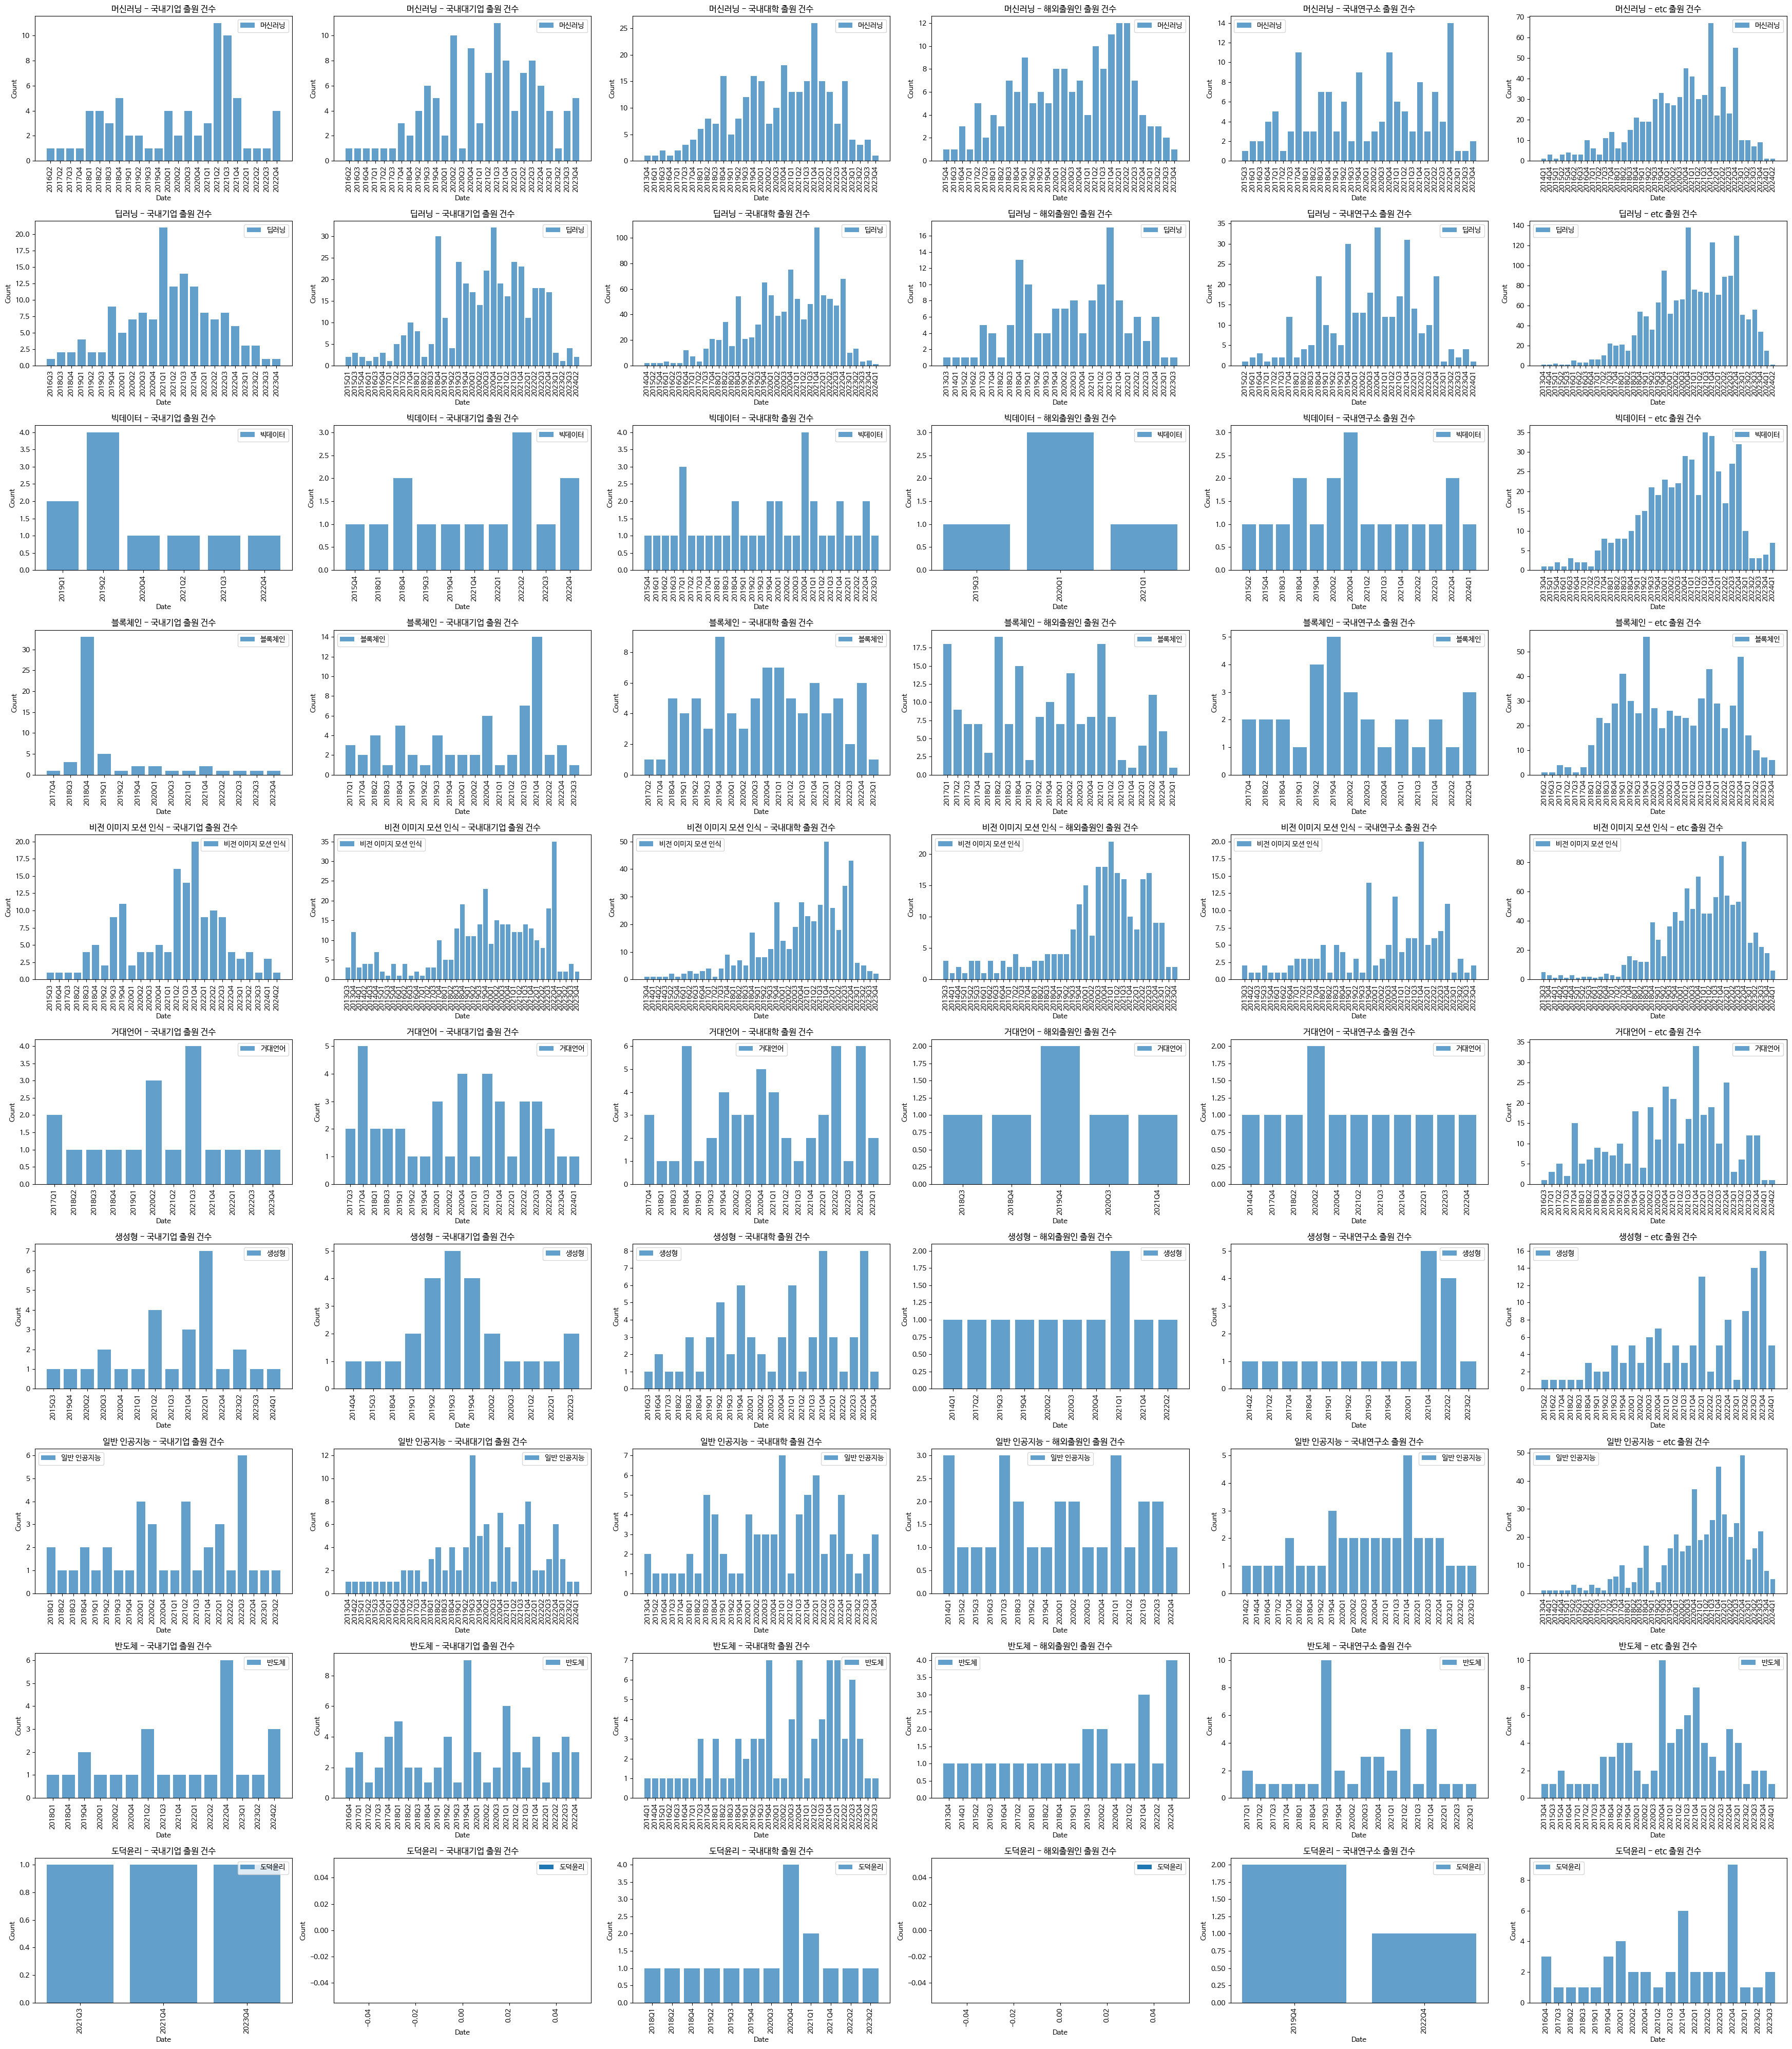

In [22]:
# 기술 키워드별 데이터 추출 함수 정의
def filter_data_by_keywords(df, keywords_dict):
    filtered_data = {}
    for key, keywords in keywords_dict.items():
        key_matches = df[df['title'].str.contains('|'.join(keywords), case=False)]
        filtered_data[key] = key_matches
    return filtered_data

# 기술 키워드별 데이터 추출
filtered_data = filter_data_by_keywords(data, keywords_dict)

# 전체 키워드별 출원 건수 시각화 (11x1)
plt.figure(figsize=(8, 30))
for i, (key, df) in enumerate(filtered_data.items(), 1):
    plt.subplot(len(filtered_data), 1, i)
    df.groupby(df['application_date'].dt.to_period('Q')).size().plot(kind='bar', label=key)
    plt.title(f'출원 건수 ({key})')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.show()



# 출원인 그룹 리스트 정의
applicant_groups = ['국내기업', '국내대기업','국내대학','해외출원인', '국내연구소', 'etc']

# 출원인 그룹별 기술 키워드 출원 건수 시각화 (Bar plot, 1열로 행 방향으로 증가)
plt.figure(figsize=(35, 40))

num_keywords = len(keywords_dict)
num_applicant_groups = len(applicant_groups)

for j, group in enumerate(applicant_groups, 1):
    for k, (key, df) in enumerate(filtered_data.items(), 1):
        plt.subplot(num_keywords, num_applicant_groups, (k-1) * num_applicant_groups + j)
        group_df = df[df['applicant_lgrp'] == group]
        group_counts = group_df.groupby(group_df['application_date'].dt.to_period('Q')).size()
        plt.bar(group_counts.index.astype(str), group_counts, label=key, alpha=0.7)
        plt.title(f'{key} - {group} 출원 건수')
        plt.xlabel('Date')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.legend()

plt.tight_layout()
plt.show()

In [23]:
### 2022년 12월 31일까지만 plot

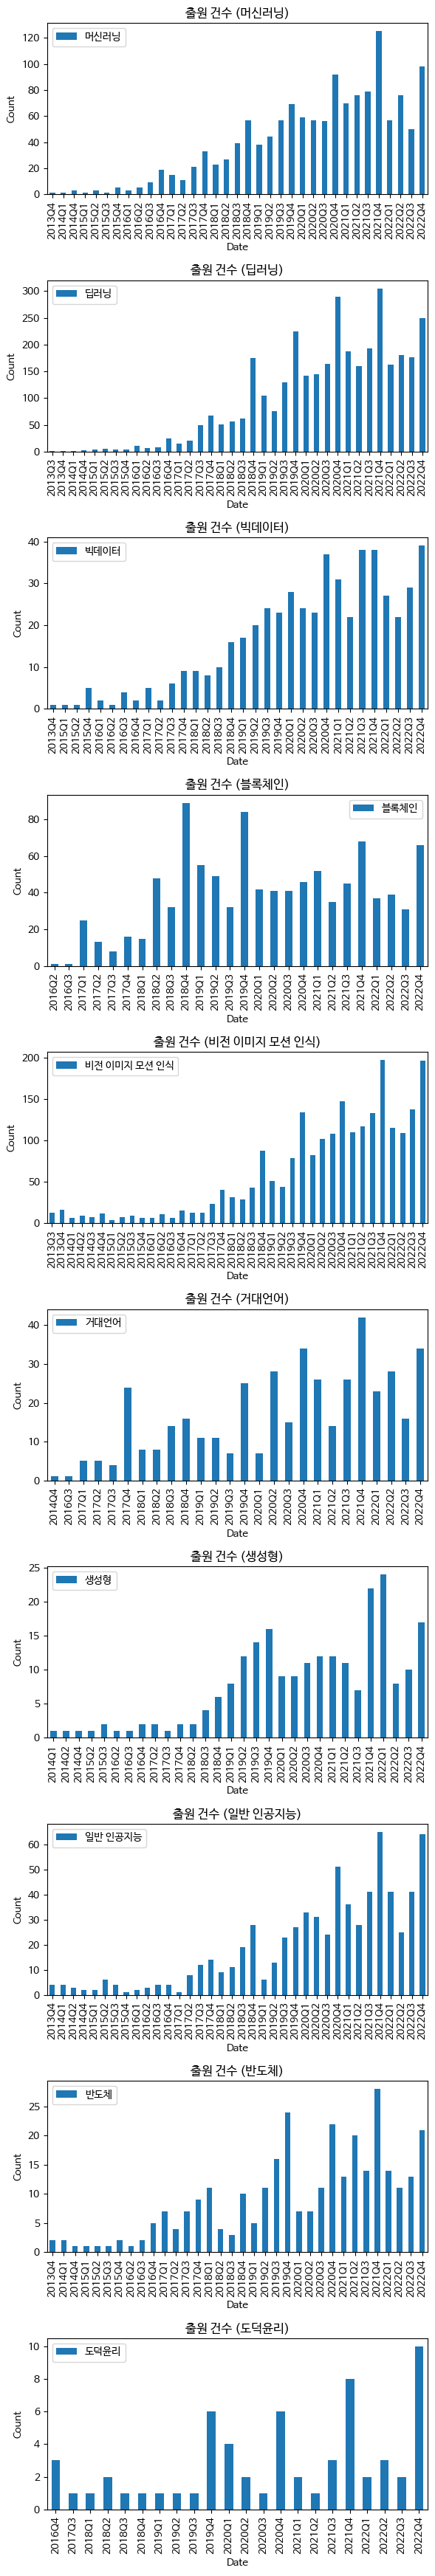

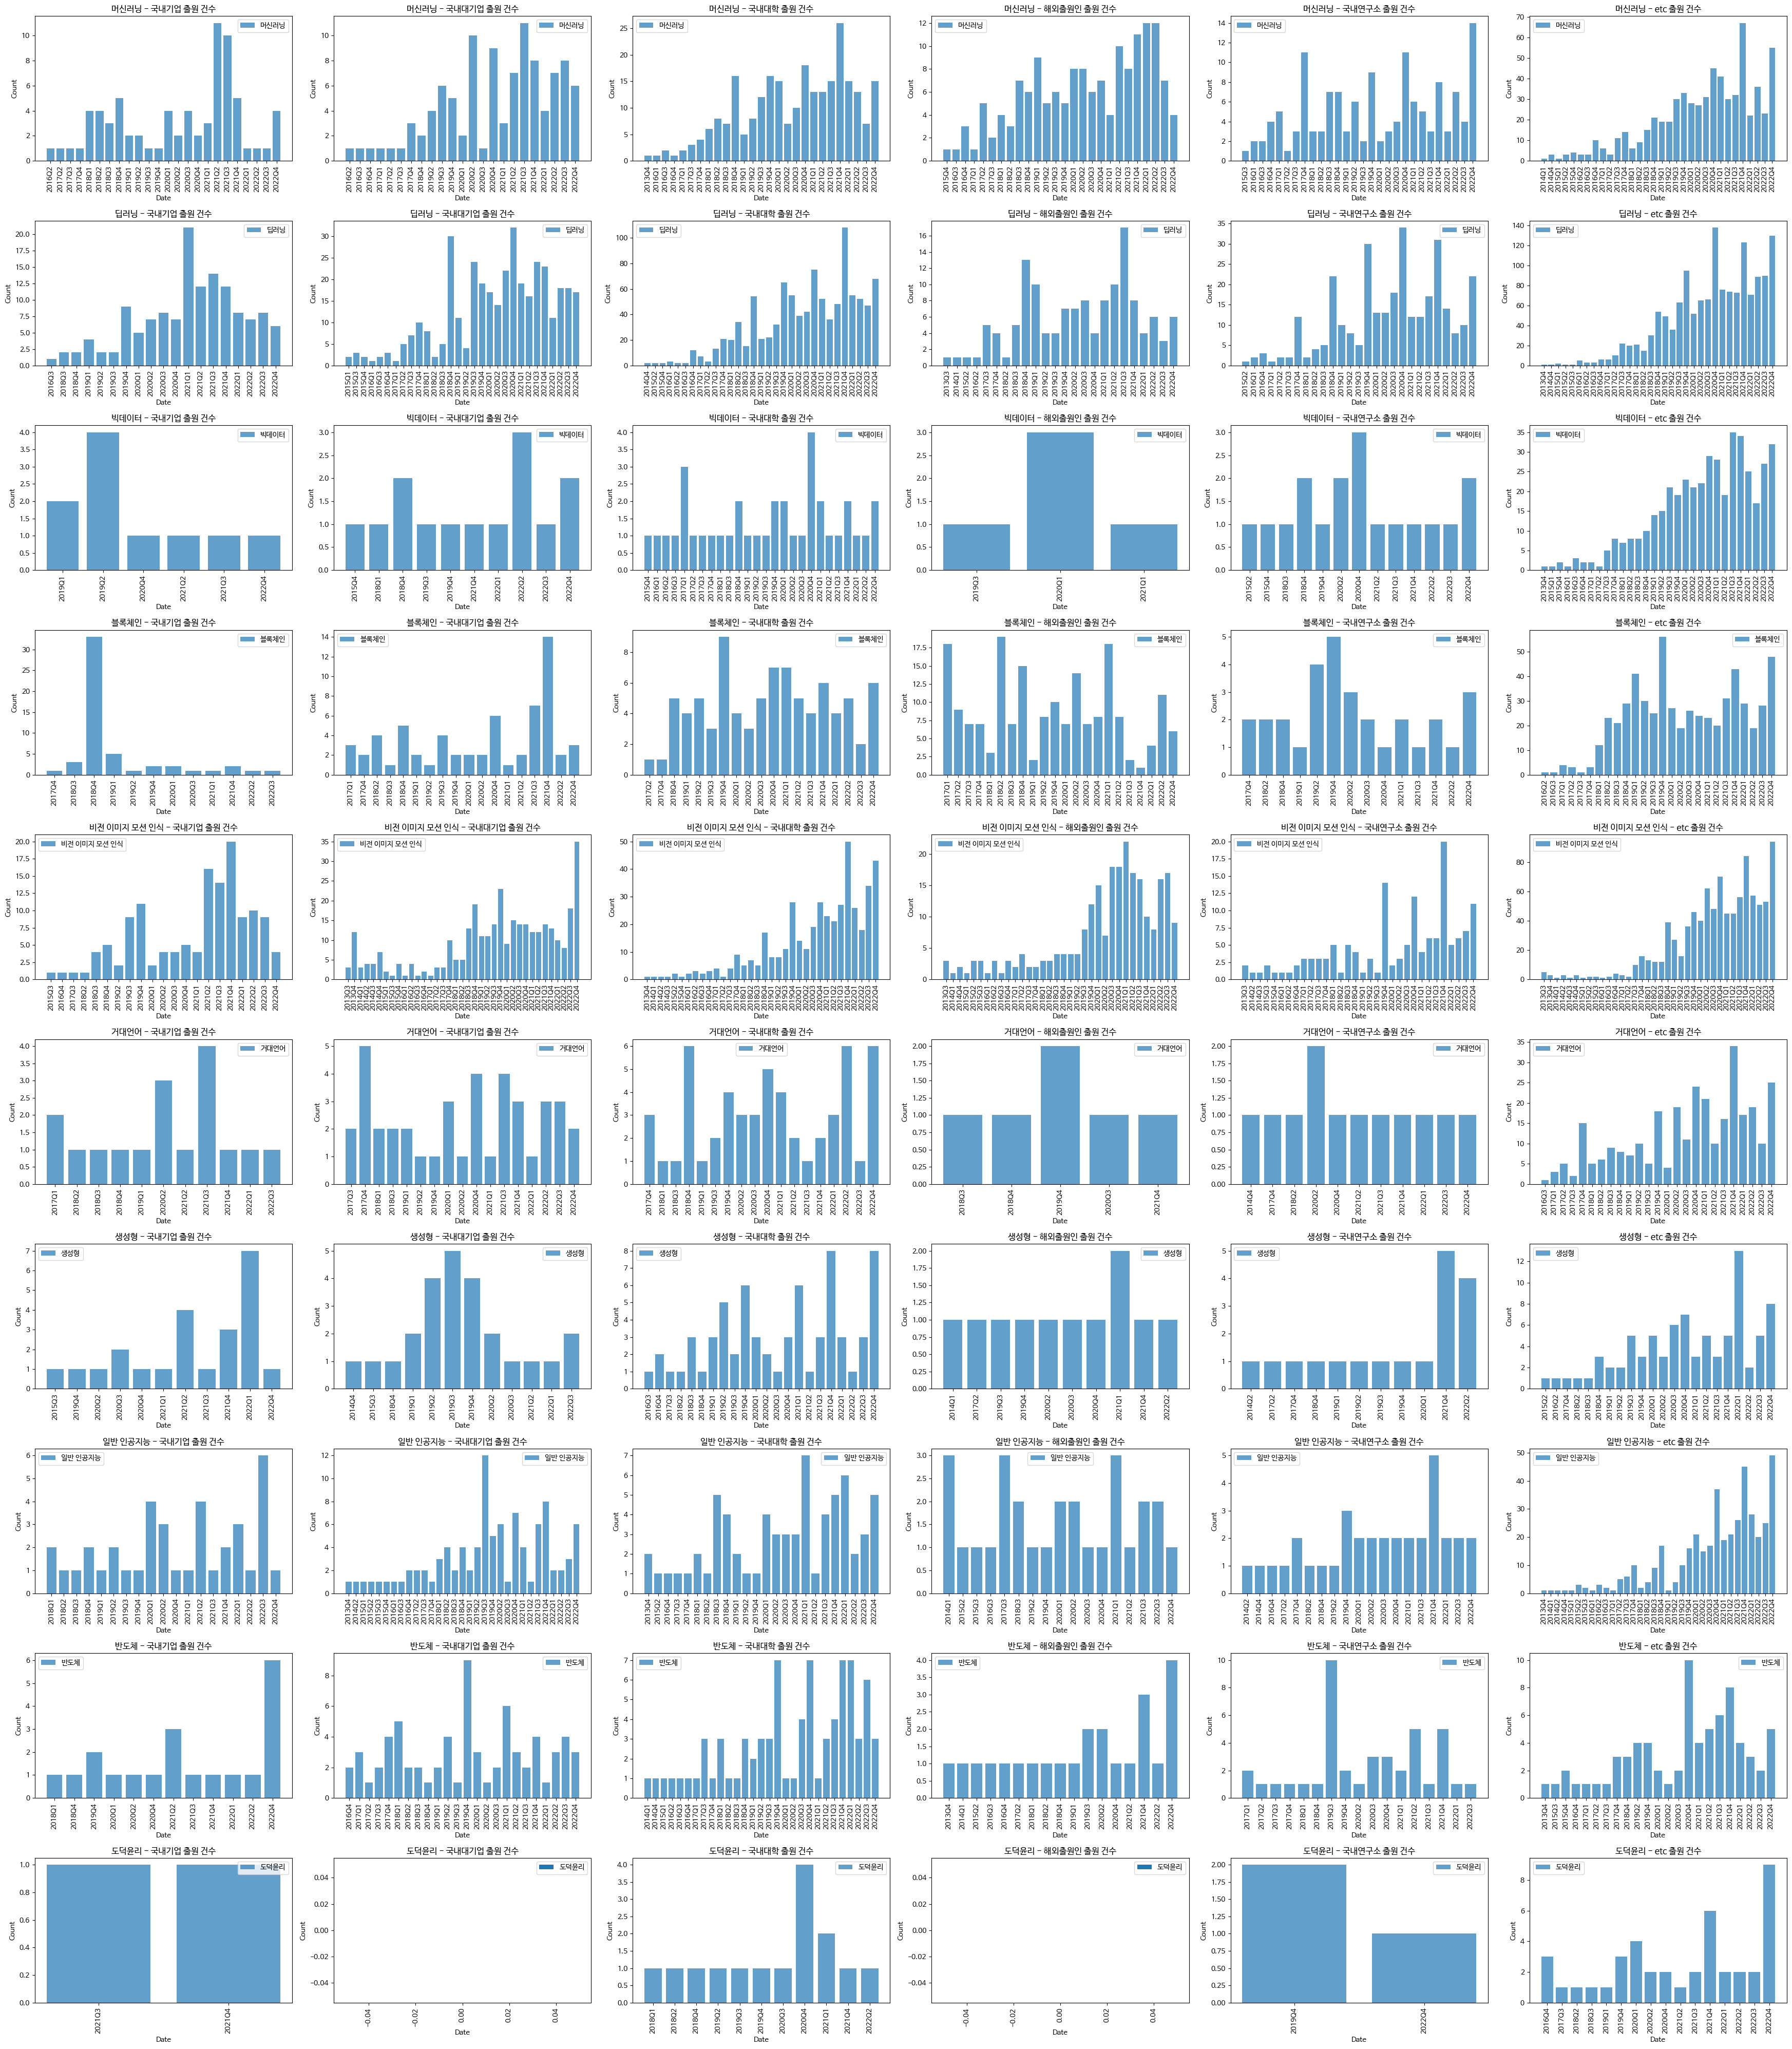

In [24]:
# 기술 키워드별 데이터 추출 함수 정의
def filter_data_by_keywords(df, keywords_dict):
    filtered_data = {}
    for key, keywords in keywords_dict.items():
        key_matches = df[df['title'].str.contains('|'.join(keywords), case=False)]
        filtered_data[key] = key_matches
    return filtered_data

# 기술 키워드별 데이터 추출
data = data[data['application_date'] <= '2022-12-31']
filtered_data = filter_data_by_keywords(data, keywords_dict)

# 전체 키워드별 출원 건수 시각화 (11x1)
plt.figure(figsize=(6, 35))
for i, (key, df) in enumerate(filtered_data.items(), 1):
    plt.subplot(len(filtered_data), 1, i)
    df.groupby(df['application_date'].dt.to_period('Q')).size().plot(kind='bar', label=key)
    plt.title(f'출원 건수 ({key})')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.show()



# 출원인 그룹 리스트 정의
applicant_groups = ['국내기업', '국내대기업','국내대학','해외출원인', '국내연구소', 'etc']

# 출원인 그룹별 기술 키워드 출원 건수 시각화 (Bar plot, 1열로 행 방향으로 증가)
plt.figure(figsize=(35, 40))

num_keywords = len(keywords_dict)
num_applicant_groups = len(applicant_groups)

for j, group in enumerate(applicant_groups, 1):
    for k, (key, df) in enumerate(filtered_data.items(), 1):
        plt.subplot(num_keywords, num_applicant_groups, (k-1) * num_applicant_groups + j)
        group_df = df[df['applicant_lgrp'] == group]
        group_counts = group_df.groupby(group_df['application_date'].dt.to_period('Q')).size()
        plt.bar(group_counts.index.astype(str), group_counts, label=key, alpha=0.7)
        plt.title(f'{key} - {group} 출원 건수')
        plt.xlabel('Date')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.legend()

plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl


df=pd.read_excel('result_mod_30June2024.xlsx')

data=df.copy()

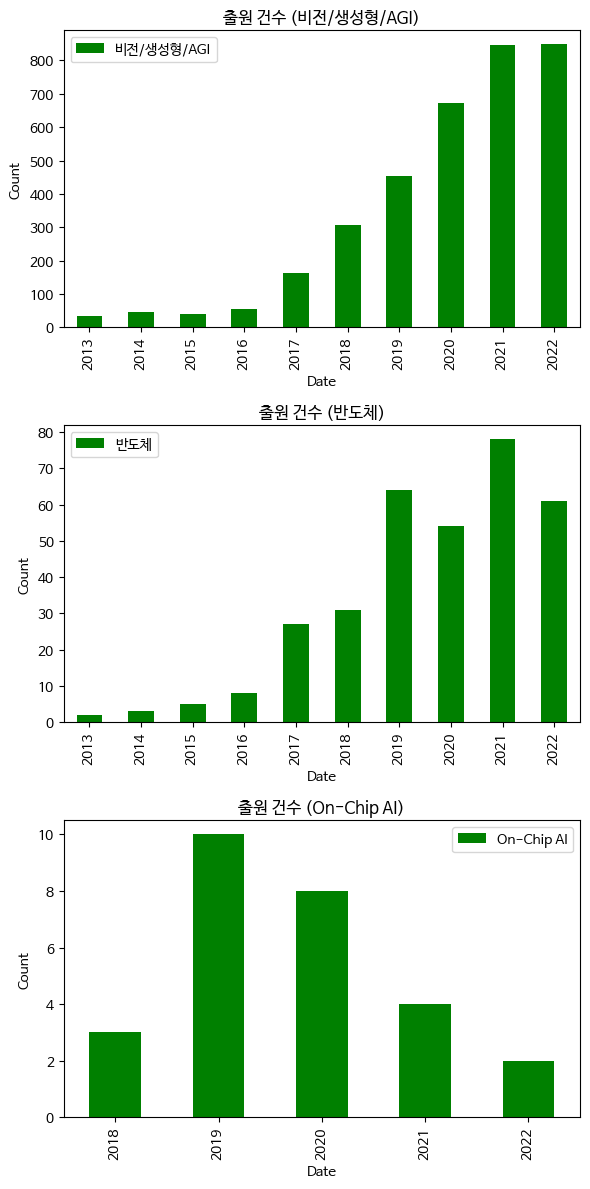

In [26]:

# 기술 유형별 키워드 리스트
## 지금은 연도별... 상위출원인에 대해서, 관심가는 출원인에 대해서..
keywords_dict = {
    '비전/생성형/AGI':['컴퓨터 비전', 'Computer Vision', 'CV','제스처','제스쳐', '피사체','이미지', '동작 인식', '동작인식', '모션 인식','모션인식','객체 인식','오브젝트 인식','패턴인식','패턴 인식','안면','ILSVRC','이미지넷','이미지 넷','알렉스넷','알렉스 넷','NLP','자연어처리','자연어 처리', '챗봇','거대 언어','거대언어','llm','생성형','그림 그리기','음성 생성', '보이스', '영상 생성', '영상 제작', '음악 제작','사진 생성', '글쓰기', '이미지 생성','chat gpt','챗 gpt','챗 지피티','제미나이','메타 라마','agi', '일반 인공지능', '일반 ai', '사람 수준', '자율 인공지능', '자율 AI', '자율 학습'],
    '반도체': ['뉴로모픽', '인공지능 반도체', 'ai 반도체', 'npu', '양자 소자','양자 컴퓨팅','양자 소자','양자 디바이스', '온 칩', '온칩', '온 디바이스','온디바이스', 'on chip'],
    'On-Chip AI': ['온 칩', '온칩', '온 디바이스','온디바이스', 'on chip']
}
# 기술 키워드별 데이터 추출 함수 정의
def filter_data_by_keywords(df, keywords_dict):
    filtered_data = {}
    for key, keywords in keywords_dict.items():
        key_matches = df[df['title'].str.contains('|'.join(keywords), case=False)]
        filtered_data[key] = key_matches
    return filtered_data

# 기술 키워드별 데이터 추출
#data2 = data[(data['application_date'] <= '2022-12-31') & (data['application_date'] >= '2021-01-31')]
data2 = data[(data['application_date'] <= '2022-12-31')]
filtered_data = filter_data_by_keywords(data2, keywords_dict)

# 전체 키워드별 출원 건수 시각화 (11x1)
plt.figure(figsize=(6, 12))
for i, (key, df) in enumerate(filtered_data.items(), 1):
    plt.subplot(len(filtered_data), 1, i)
    df.groupby(df['application_date'].dt.to_period('Y')).size().plot(kind='bar', color= 'g', label=key)
    plt.title(f'출원 건수 ({key})')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.show()

In [27]:
### KT 경제 경영연구소 & 한경 AI 경제 연구소 공동 선정 2023 유망 AI/인공지능 start-up

['나니아랩스', '넷타겟','누비랩', '뉴로젠','뉴빌리티','니어스랩','도구공간','디사일로','디오비스튜디오','딥서치',
'딥카디오','라이너','라이언로켓','로보','루나소프트','룰루랩','뤼튼테크놀로지스','리코','마크비전','매드업',
'메디인테크','메이아이','모라이','모레','모아이스','몬드리안에이아이','바오밥에이바이오','베스텔라랩','베슬에이아이','비주얼캠프',
'빅인사이트','세이지리서치','스누아이랩','스캐터랩','스프링클라우드','시즐','시큐웍스','심플렉스','써로마인드','쓰리아이',
'씨메스','씨앤에이아이','씨어스테크놀로지','아드리엘','아이브','아이오크롭스','아이지넷','아틀라스랩스','아하앤컴퍼니','악어디지털',
'안가본길','알고리즘랩스','알세미','알티엠','어반베이스','에니아이','에스아이에이','에스투더블유','에이모','에이슬립',
'에이트테크','엑스와이지','엘리스르룹','오토노머스에이투지','온코소프트','온코크로스','올거나이즈코리아','옴니어스','이마고웍스','인텐트코퍼레이션',
'인세리브로','인이지','인포마이닝','임프리메드코리아','제네시스랩','지니얼로지','커먼컴퓨터','크로커스','클라리파이','클래스팅',
'클레온','클리카','튜닙','트웰브랩스','파이온','파일러','펀진','펫나우','포지큐브','포티투마루',
'프렌들리에이아이','플라스크','해줌','휴멜로','휴톰','바스젠바이오', '비알랩','에임퓨처','아파피루스','후이노']

['나니아랩스',
 '넷타겟',
 '누비랩',
 '뉴로젠',
 '뉴빌리티',
 '니어스랩',
 '도구공간',
 '디사일로',
 '디오비스튜디오',
 '딥서치',
 '딥카디오',
 '라이너',
 '라이언로켓',
 '로보',
 '루나소프트',
 '룰루랩',
 '뤼튼테크놀로지스',
 '리코',
 '마크비전',
 '매드업',
 '메디인테크',
 '메이아이',
 '모라이',
 '모레',
 '모아이스',
 '몬드리안에이아이',
 '바오밥에이바이오',
 '베스텔라랩',
 '베슬에이아이',
 '비주얼캠프',
 '빅인사이트',
 '세이지리서치',
 '스누아이랩',
 '스캐터랩',
 '스프링클라우드',
 '시즐',
 '시큐웍스',
 '심플렉스',
 '써로마인드',
 '쓰리아이',
 '씨메스',
 '씨앤에이아이',
 '씨어스테크놀로지',
 '아드리엘',
 '아이브',
 '아이오크롭스',
 '아이지넷',
 '아틀라스랩스',
 '아하앤컴퍼니',
 '악어디지털',
 '안가본길',
 '알고리즘랩스',
 '알세미',
 '알티엠',
 '어반베이스',
 '에니아이',
 '에스아이에이',
 '에스투더블유',
 '에이모',
 '에이슬립',
 '에이트테크',
 '엑스와이지',
 '엘리스르룹',
 '오토노머스에이투지',
 '온코소프트',
 '온코크로스',
 '올거나이즈코리아',
 '옴니어스',
 '이마고웍스',
 '인텐트코퍼레이션',
 '인세리브로',
 '인이지',
 '인포마이닝',
 '임프리메드코리아',
 '제네시스랩',
 '지니얼로지',
 '커먼컴퓨터',
 '크로커스',
 '클라리파이',
 '클래스팅',
 '클레온',
 '클리카',
 '튜닙',
 '트웰브랩스',
 '파이온',
 '파일러',
 '펀진',
 '펫나우',
 '포지큐브',
 '포티투마루',
 '프렌들리에이아이',
 '플라스크',
 '해줌',
 '휴멜로',
 '휴톰',
 '바스젠바이오',
 '비알랩',
 '에임퓨처',
 '아파피루스',
 '후이노']

In [28]:
data.columns

Index(['Unnamed: 0', 'status', 'title', 'ap_num', 'application_date',
       'applicant', 'representative', 'final_owner', 'priority_date',
       'international_filing_date', 'summary', '제너럴', '의료', '전자상거래서비스', '자동차',
       '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', '반도체', 'applicant_sgrp',
       'applicant_lgrp', 'ongoing', 'application_year'],
      dtype='object')

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl


df=pd.read_excel('result_mod_30June2024.xlsx')

data=df.copy()
# '국내기업' 또는 'etc'로 분류된 출원인을 필터링
filtered_data = data[(data['applicant_lgrp'] == '국내기업') | (data['applicant_lgrp'] == 'etc')]

# 출원인의 출원 건수를 집계
applicant_counts = filtered_data['applicant_sgrp'].value_counts().reset_index()
applicant_counts.columns = ['applicant_sgrp', 'patent_count']

# 출원 건수가 많은 순서대로 정렬
sorted_applicant_counts = applicant_counts.sort_values(by='patent_count', ascending=False)

# 상위 10명의 출원인을 출력
sorted_applicant_counts.head(21)



,applicant_sgrp,patent_count
0,etc,19416
1,인피닉,125
2,뤼이드,86
3,크라우드웍스,86
4,비전,81
5,딥브레인에이아이,73
6,로보,69
7,제이엘케이,67
8,자이냅스,66
9,메디컬에이아이,64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4224\1675025698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['application_year'] = pd.to_datetime(filtered_data['application_date']).dt.year


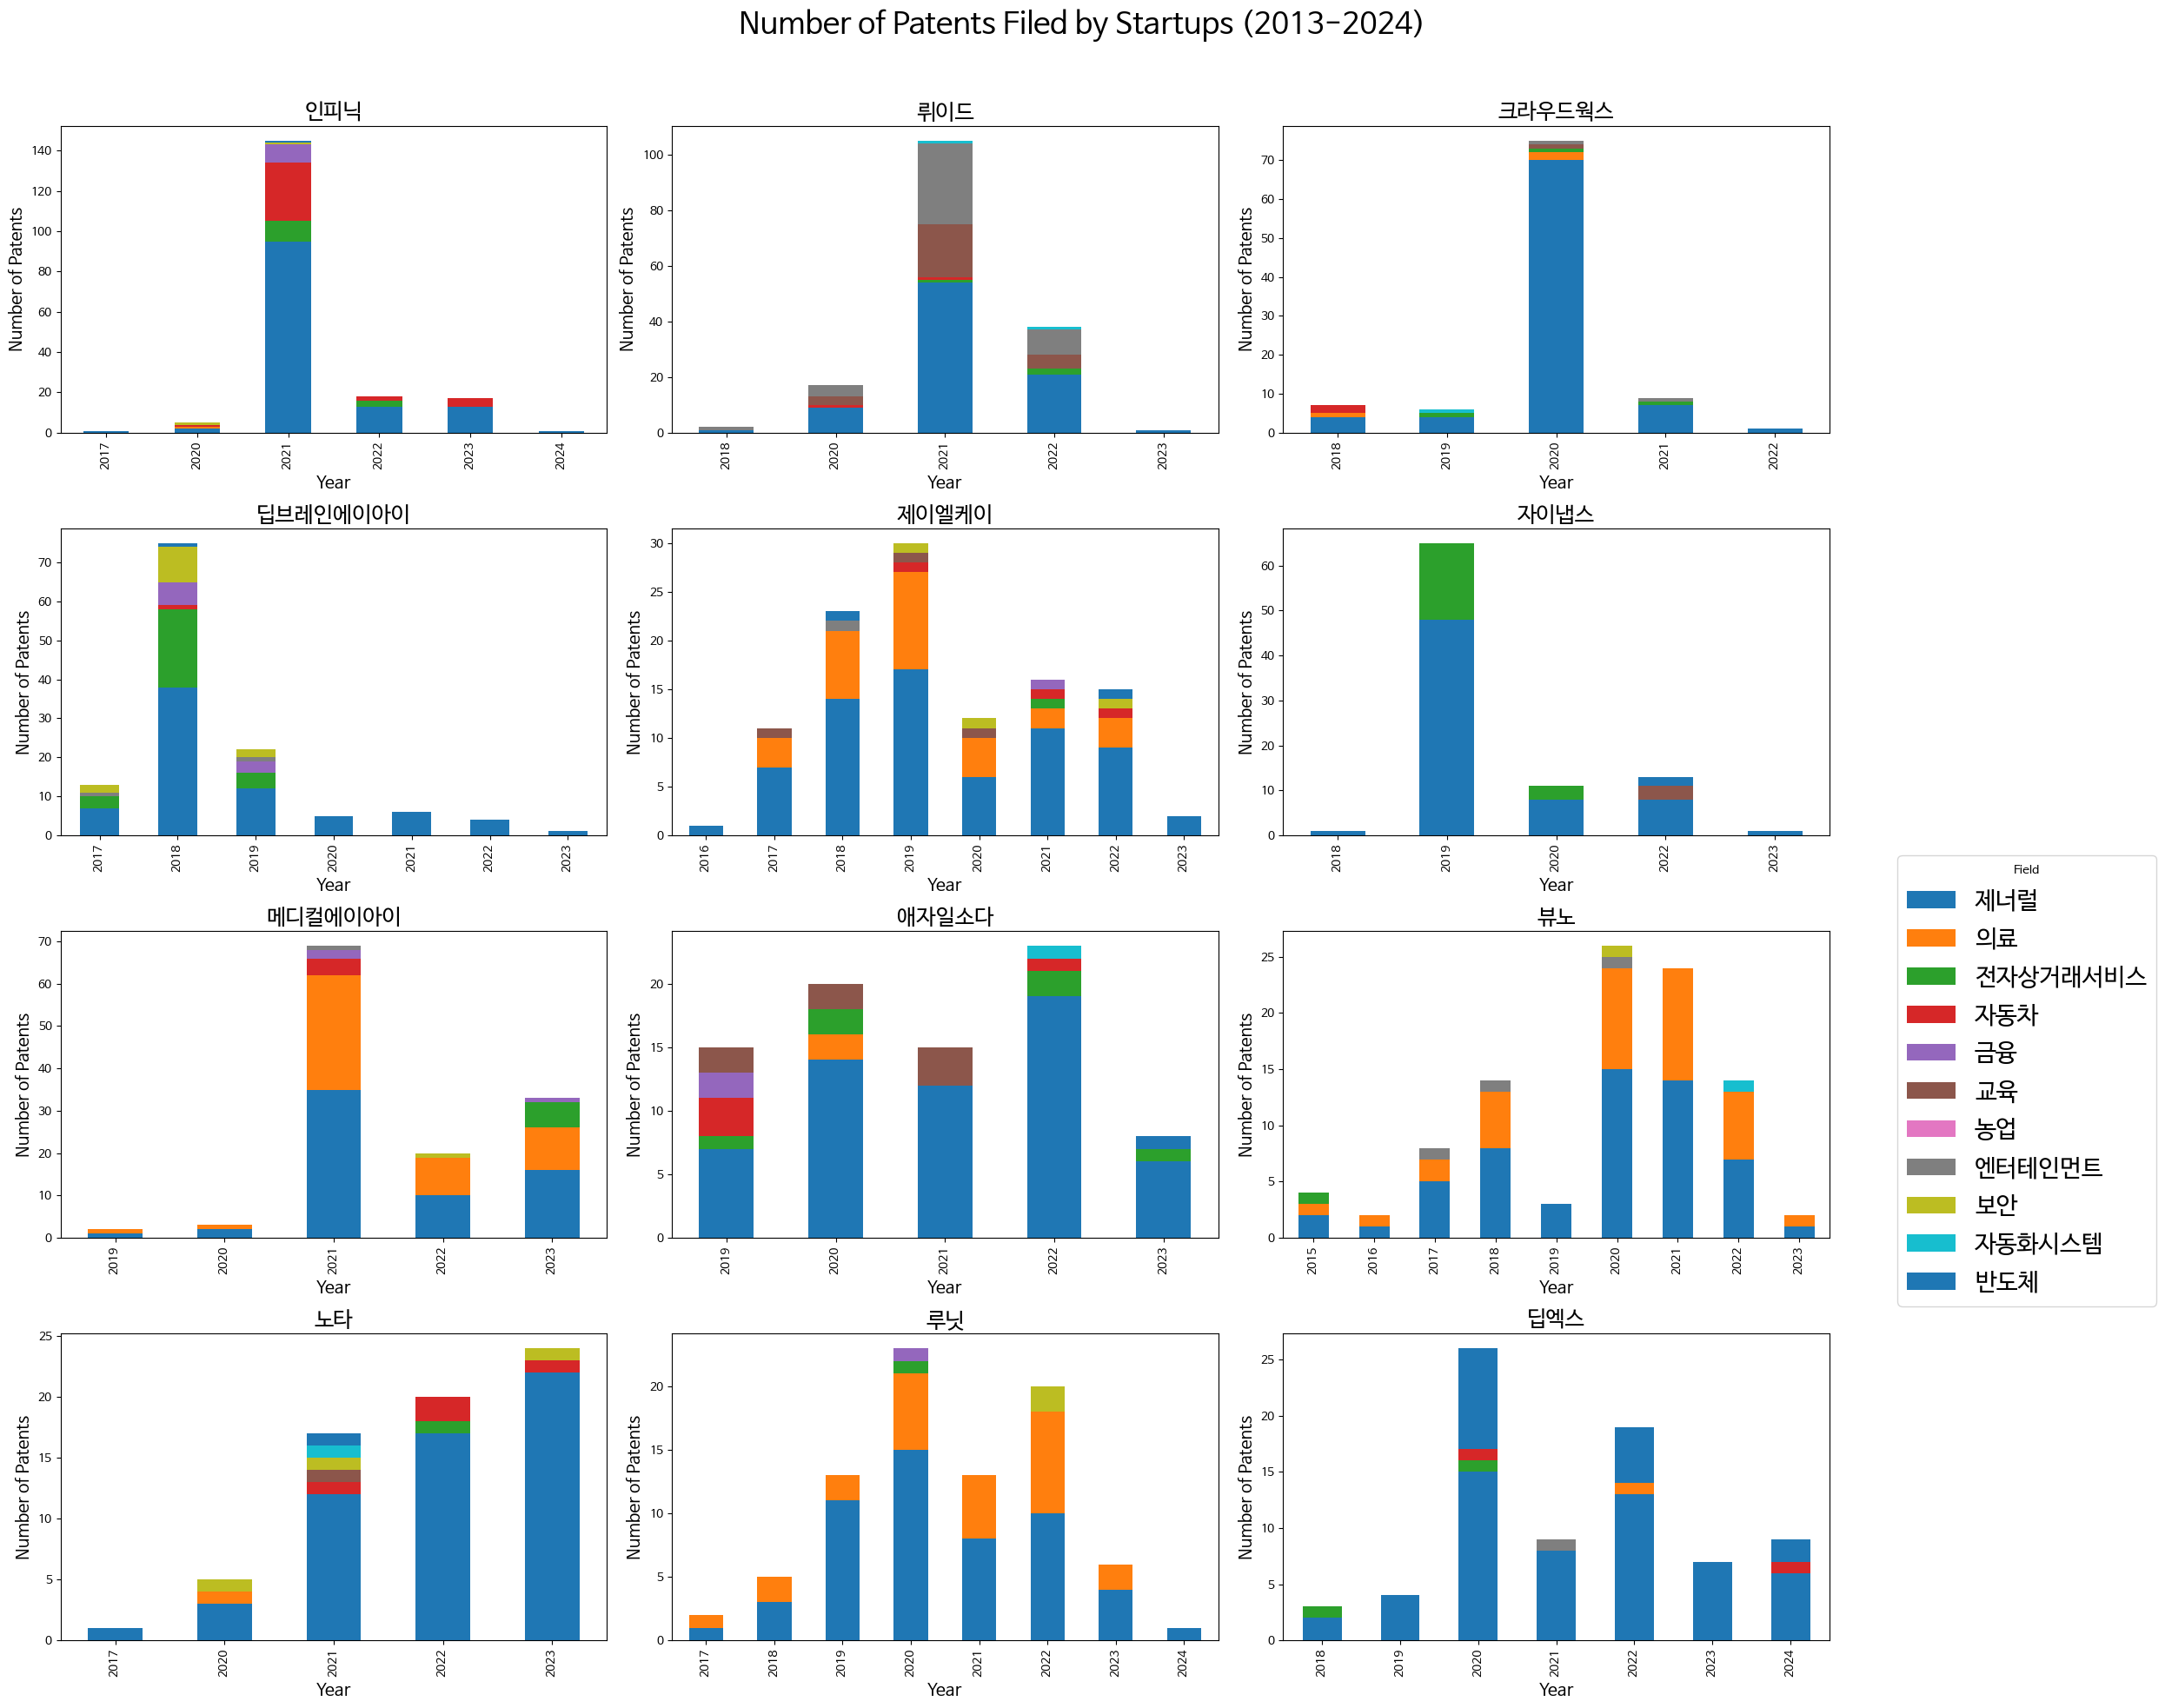

In [30]:
# 스타트업 리스트
start_up = ['인피닉', '뤼이드', '크라우드웍스','딥브레인에이아이','제이엘케이', '자이냅스', '메디컬에이아이', '애자일소다', '뷰노','노타', '루닛', '딥엑스']
# 스타트업에 해당하는 특허만 필터링
filtered_data = data[data['applicant_sgrp'].isin(start_up)]

# 'application_year' 컬럼을 연도로 변환
filtered_data['application_year'] = pd.to_datetime(filtered_data['application_date']).dt.year

# 분야별로 특허 출원 건수를 계산하기 위해 필요한 컬럼들
fields = ['제너럴', '의료', '전자상거래서비스', '자동차', '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', '반도체']

# 그래프를 설정
num_startups = len(start_up)
fig, axes = plt.subplots(nrows=num_startups//3 + (num_startups % 3 > 0), ncols=3, figsize=(25, 20))
axes = axes.flatten()

for i, company in enumerate(start_up):
    company_data = filtered_data[filtered_data['applicant_sgrp'] == company]
    company_field_counts = company_data.groupby('application_year')[fields].sum().reset_index()
    company_field_counts.set_index('application_year', inplace=True)
    company_field_counts.plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(company, fontsize=18)
    axes[i].set_xlabel('Year', fontsize=14)
    axes[i].set_ylabel('Number of Patents', fontsize=14)


# 전체 그래프 설정
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Field', bbox_to_anchor=(1, 0.5), loc='upper right', fontsize=20)
plt.suptitle('Number of Patents Filed by Startups (2013-2024)', fontsize=25)
plt.tight_layout(rect=[0, 0, 0.85, 0.96])

# 그래프를 JPG로 저장
plt.savefig('startups_patents.jpg', format='jpg', dpi=300)

# 그래프 보여주기
plt.show()

In [31]:
data.columns

Index(['Unnamed: 0', 'status', 'title', 'ap_num', 'application_date',
       'applicant', 'representative', 'final_owner', 'priority_date',
       'international_filing_date', 'summary', '제너럴', '의료', '전자상거래서비스', '자동차',
       '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', '반도체', 'applicant_sgrp',
       'applicant_lgrp', 'ongoing', 'application_year'],
      dtype='object')

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl


df=pd.read_excel('result_mod_30June2024.xlsx')

data=df.copy()
# 'applicant'로 그룹바이하여 출원 건수를 계산합니다.
grouped_data = data.groupby('applicant').size().reset_index(name='patent_count')

# 원래 데이터와 그룹바이한 데이터프레임을 병합하여 'applicant_lgrp' 정보를 추가합니다.
merged_data = pd.merge(grouped_data, data[['applicant', 'applicant_lgrp']], on='applicant', how='left').drop_duplicates()

# 'applicant_lgrp'가 '국내기업' 또는 'etc'인 출원인을 필터링합니다.
filtered_data = merged_data[(merged_data['applicant_lgrp'] == '국내기업') | (merged_data['applicant_lgrp'] == 'etc')]

# 출원 건수가 많은 순서대로 정렬합니다.
sorted_applicant_counts = filtered_data.sort_values(by='patent_count', ascending=False)

# 상위 20명의 출원인을 출력합니다.
print(sorted_applicant_counts.head(40))

                applicant  patent_count applicant_lgrp
28285            주식회사 인피닉           119           국내기업
735                (주)뤼이드            86           국내기업
29703         주식회사 크라우드웍스            86           국내기업
22378       주식회사 딥브레인에이아이            73           국내기업
2341             (주)제이엘케이            66           국내기업
28490           주식회사 자이냅스            66           국내기업
23313        주식회사 메디컬에이아이            64           국내기업
25723          주식회사 애자일소다            58           국내기업
23860             주식회사 뷰노            56           국내기업
21552             주식회사 노타            55           국내기업
22466            주식회사 딥엑스            53           국내기업
22848             주식회사 루닛            53           국내기업
23164          주식회사 마키나락스            51           국내기업
24855         주식회사 스트라드비젼            51           국내기업
19740           인포뱅크 주식회사            49           국내기업
26455         주식회사 에이젠글로벌            49           국내기업
24161         주식회사 비즈모델라인            49           국내기업
22299     

In [33]:

# 우선권 주장 특허 count
duplicate_patents = data[data['priority_date'].notnull()]
num_duplicate_patents = len(duplicate_patents)

# 국제 출원 특허 count
international_patents = data[data['international_filing_date'].notnull()]
num_international_patents = len(international_patents)

# 결과 출력
print(f"우선권 주장 개수: {num_duplicate_patents}")
print(f"국제 출원 특허 개수: {num_international_patents}")

우선권 주장 개수: 8642
국제 출원 특허 개수: 3855
